In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)


In [4]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [5]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [6]:
df = df.loc[df['profit'] > 0 ]

In [7]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495


In [8]:
df['return_rate'] = df['profit']/df['production_budget']
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,119.275143
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,9.234857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500


## What Genre Is the most profitible?

In [19]:
df_profit = df.sort_values(by=['profit'], ascending = False )
top_50_profit = df_profit.head(25)
top_50_profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,6.993278
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,5.746382
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,9.733545
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,5.741291
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,6.681016


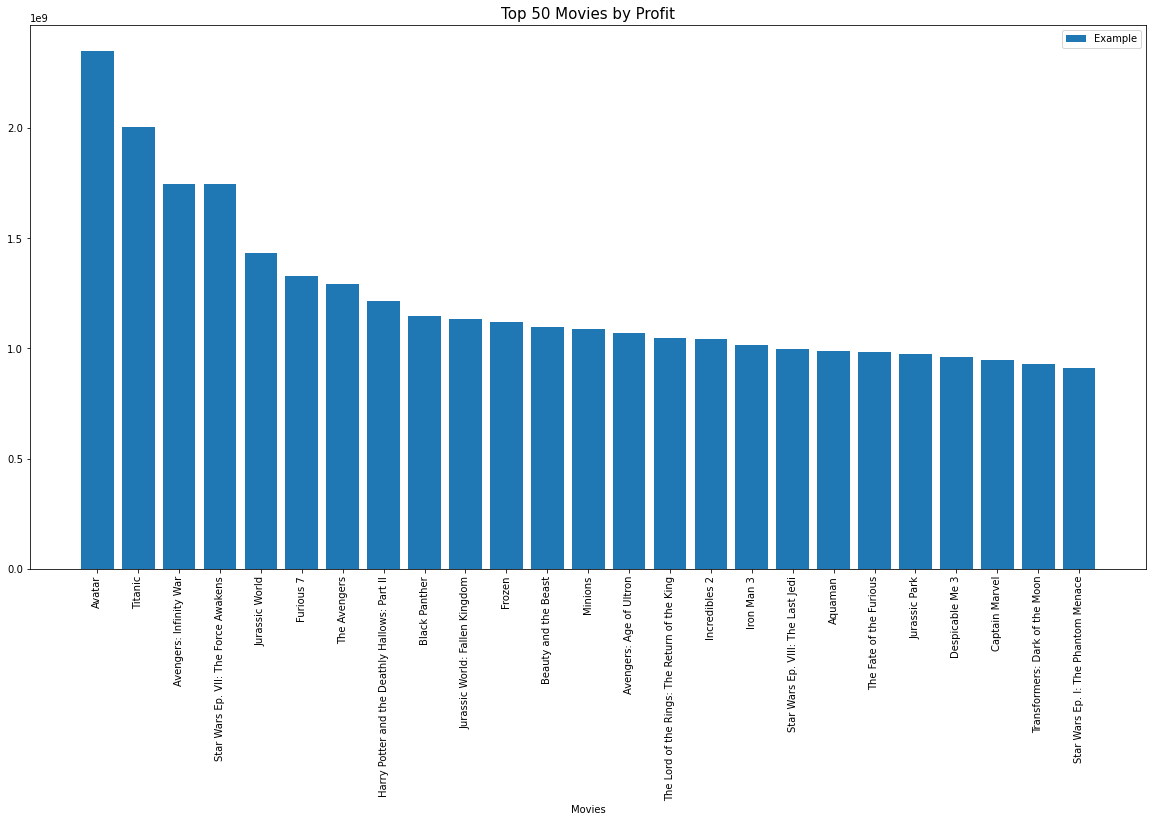

In [20]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_50_profit['movie'], top_50_profit['profit'] )

# Add labels for x and y axes
ax.set_xlabel('Movies')


# Add a title for the plot
ax.set_title('Top 50 Movies by Profit', fontsize=15)

ax.tick_params(axis='x', labelrotation = 90)

# add a legend 
ax.legend(["Example"], loc=1);

## What Movies have the best rate of return?

In [21]:
df_return_rate = df.sort_values(by=['return_rate'], ascending = False )
df_return_rate = df_return_rate.drop(labels=5745, axis=0)
df_return_rate

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,22168808,341.058585
...,...,...,...,...,...,...,...,...
1135,36,"Feb 14, 1997",Absolute Power,50000000,50068310,50068310,68310,0.001366
1142,43,"Aug 11, 2000",The Replacements,50000000,44737059,50054511,54511,0.001090
5495,96,"Aug 22, 1997",Sunday,450000,410919,450349,349,0.000776
4929,30,"Jan 29, 1993",Nemesis,2000000,2001124,2001124,1124,0.000562


In [22]:
df_return_rate = df.sort_values(by=['return_rate'], ascending = False )
df_return_rate

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,44975000,1799.000000
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333
...,...,...,...,...,...,...,...,...
1135,36,"Feb 14, 1997",Absolute Power,50000000,50068310,50068310,68310,0.001366
1142,43,"Aug 11, 2000",The Replacements,50000000,44737059,50054511,54511,0.001090
5495,96,"Aug 22, 1997",Sunday,450000,410919,450349,349,0.000776
4929,30,"Jan 29, 1993",Nemesis,2000000,2001124,2001124,1124,0.000562


In [13]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,119.275143
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,9.234857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500


## What time of year Is the best time to release a movie?

In [14]:
df_release_date = df.sort_values(by=['release_date'] )


In [15]:
df_release_date["release_date"] = df_release_date["release_date"].str.replace(",","")
df_release_date["release_date"] = df_release_date["release_date"].str.replace(" ",",")

In [16]:
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198
271,72,"Apr,1,2010",Clash of the Titans,125000000,163214888,493214888,368214888,2.945719
5454,55,"Apr,1,2011",Rubber,500000,100370,680914,180914,0.361828
4227,28,"Apr,1,2011",Haevnen,5500000,1008098,15867314,10367314,1.884966
1795,96,"Apr,1,2011",Source Code,32000000,54712227,140428499,108428499,3.388391
...,...,...,...,...,...,...,...,...
4975,76,"Sep,9,2011",Grave Encounters,2000000,0,2151887,151887,0.075943
870,71,"Sep,9,2011",Contagion,60000000,75658097,137551594,77551594,1.292527
3584,85,"Sep,9,2016",When the Bough Breaks,10000000,29747603,30768449,20768449,2.076845
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112


In [17]:
df_release_date['day'] = 1 
df_release_date['year'] = 2
split =  df_release_date['release_date'].str.split(',', expand=True)
df_release_date['month'], df_release_date['day'], df_release_date['year']= split[0], split[1], split[2]
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,day,year,month
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198,1,2005,Apr
271,72,"Apr,1,2010",Clash of the Titans,125000000,163214888,493214888,368214888,2.945719,1,2010,Apr
5454,55,"Apr,1,2011",Rubber,500000,100370,680914,180914,0.361828,1,2011,Apr
4227,28,"Apr,1,2011",Haevnen,5500000,1008098,15867314,10367314,1.884966,1,2011,Apr
1795,96,"Apr,1,2011",Source Code,32000000,54712227,140428499,108428499,3.388391,1,2011,Apr
...,...,...,...,...,...,...,...,...,...,...,...
4975,76,"Sep,9,2011",Grave Encounters,2000000,0,2151887,151887,0.075943,9,2011,Sep
870,71,"Sep,9,2011",Contagion,60000000,75658097,137551594,77551594,1.292527,9,2011,Sep
3584,85,"Sep,9,2016",When the Bough Breaks,10000000,29747603,30768449,20768449,2.076845,9,2016,Sep
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112,9,2016,Sep


In [18]:

dict_release_date = {i:e for e,i in enumerate(calendar.month_abbr)} #creates a dictionary

df_release_date.reindex(df_release_date.month.map(dict_release_date).sort_values().index) #map + sort_values + reindex with index

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,day,year,month
2859,60,"Jan,13,2006",Hoodwinked,17500000,51386611,109843390,92343390,5.276765,13,2006,Jan
1642,43,"Jan,16,2009",Hotel for Dogs,35000000,73178547,122357172,87357172,2.495919,16,2009,Jan
1164,65,"Jan,16,2009",Defiance,50000000,28644813,52987754,2987754,0.059755,16,2009,Jan
2119,20,"Jan,16,2009",Paul Blart: Mall Cop,26000000,146336178,185904750,159904750,6.150183,16,2009,Jan
2736,37,"Jan,16,2009",Notorious,19000000,36843682,44972183,25972183,1.366957,16,2009,Jan
...,...,...,...,...,...,...,...,...,...,...,...
1476,77,"Dec,25,2013",Grudge Match,40000000,29807260,69807260,29807260,0.745182,25,2013,Dec
2214,15,"Dec,25,2013",August: Osage County,25000000,37738810,50738810,25738810,1.029552,25,2013,Dec
436,37,"Dec,25,2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,1.064409,25,2013,Dec
1984,85,"Dec,25,2009",The Imaginarium of Doctor Parnassus,30000000,7689607,64352607,34352607,1.145087,25,2009,Dec
